In [44]:
from robot_vlp.config import RAW_DATA_DIR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def normalize_angle_deg(angle):
    """Normalize an angle in degrees to the range [-180, 180]."""
    return (angle + 180) % 360 - 180

def normalize_angle_rad(angle):
    """Normalize an angle in radians to the range [-π, π]."""
    return (angle + np.pi) % (2 * np.pi) - np.pi

In [2]:
ekf_df = pd.read_csv(RAW_DATA_DIR / 'experiments/live_data/ekf_run.csv', index_col= [0])
enc_df = pd.read_csv(RAW_DATA_DIR / 'experiments/live_data/encoder_run.csv', index_col= [0])

In [51]:
'encoder_eight_run.csv'.split('_', 1)[1]

'eight_run.csv'

In [82]:
def plot_run(filename, points):


    fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 4x4 grid


    ekf_df = pd.read_csv(RAW_DATA_DIR / ('experiments/live_data/'+'ekf_'+filename.split('_', 1)[1]), index_col= [0]).iloc[:points]
    enc_df = pd.read_csv(RAW_DATA_DIR / ('experiments/live_data/'+'encoder_'+filename.split('_', 1)[1]), index_col= [0]).iloc[:points]
    
    axes[0][0].set_title("EKF")
    axes[0][0].plot(ekf_df['real_x'], ekf_df['real_y'], label = 'real')
    axes[0][0].plot(ekf_df['ekf_x'], ekf_df['ekf_y'], label = 'ekf')
    axes[0][0].set_ylim(0, 1)
    axes[0][0].set_xlim(0, 1)
    axes[0][0].legend()

    axes[0][1].set_title("Encoder")
    axes[0][1].plot(enc_df['real_x'], enc_df['real_y'], label = 'real')
    axes[0][1].plot(enc_df['encoder_x'], enc_df['encoder_y'], label = 'encoder')
    axes[0][1].set_ylim(0, 1)
    axes[0][1].set_xlim(0, 1)
    axes[0][1].legend()

    enc_ang_errs = normalize_angle_deg((enc_df['encoder_heading'] - enc_df['real_heading'])).abs()
    ekf_ang_errs = normalize_angle_deg((ekf_df['ekf_heading'] - ekf_df['real_heading'])).abs()

    axes[1][0].set_title("Heading errors")
    axes[1][0].plot(enc_ang_errs, label = 'encoder')
    axes[1][0].plot(ekf_ang_errs, label = 'ekf')
    axes[1][0].legend()

    enc_loc_errs = np.sqrt((np.square(enc_df['encoder_x'] - enc_df['real_x']) + np.square(enc_df['encoder_y'] - enc_df['real_y']))[1:].to_list())
    ekf_loc_errs = np.sqrt((np.square(ekf_df['ekf_x'] - ekf_df['real_x']) + np.square(ekf_df['ekf_y'] - ekf_df['real_y']))[1:].to_list())

    axes[1][1].set_title("Location errors")
    axes[1][1].plot(enc_loc_errs, label = 'encoder')
    axes[1][1].plot(ekf_loc_errs, label = 'ekf')
    axes[1][1].legend()

    




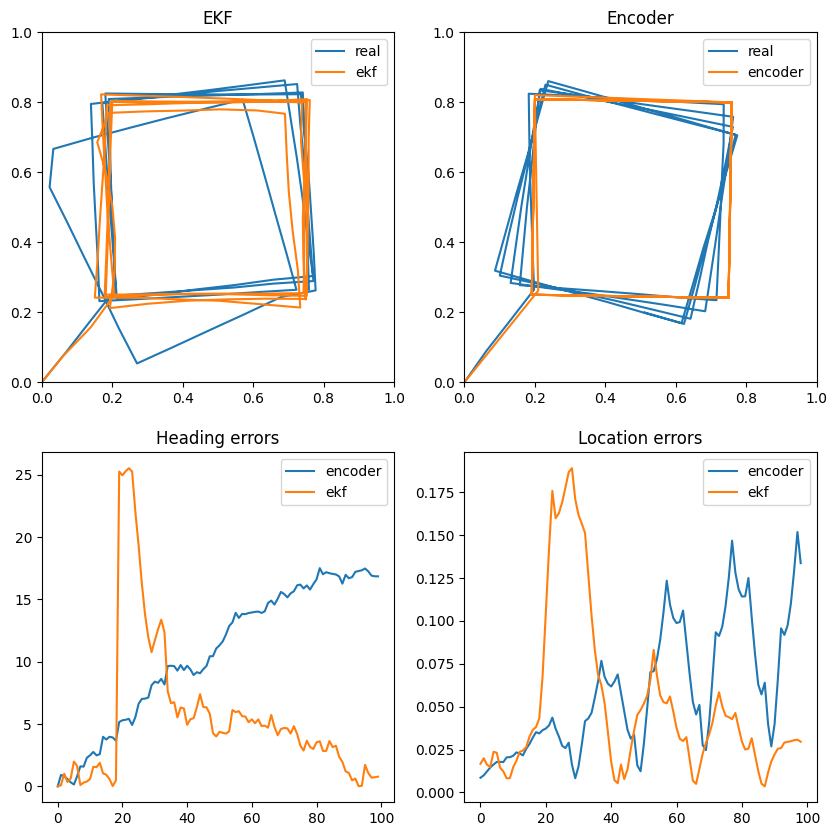

In [84]:
plot_run('ekf_run.csv', 100)

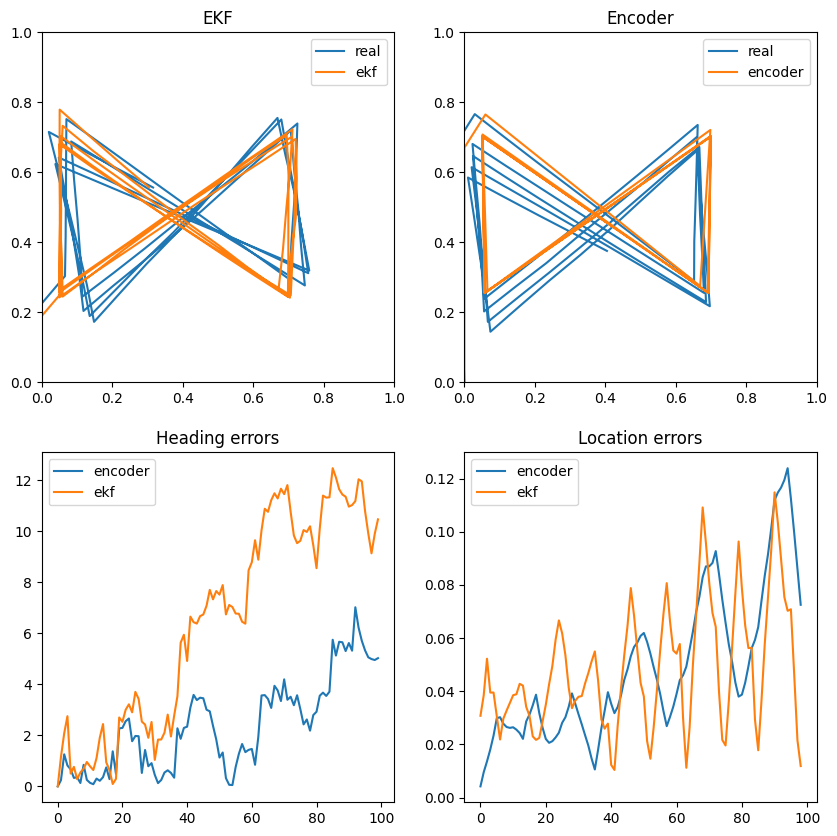

In [85]:
plot_run('encoder_eight_run.csv', 100)

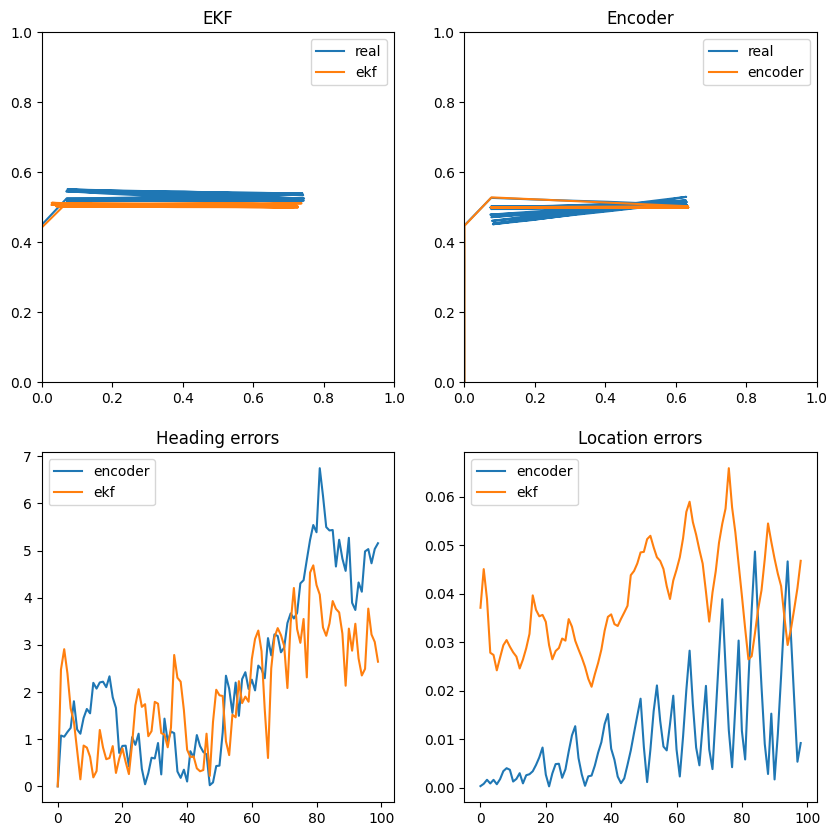

In [86]:
plot_run('ekf_line_run.csv', 100)

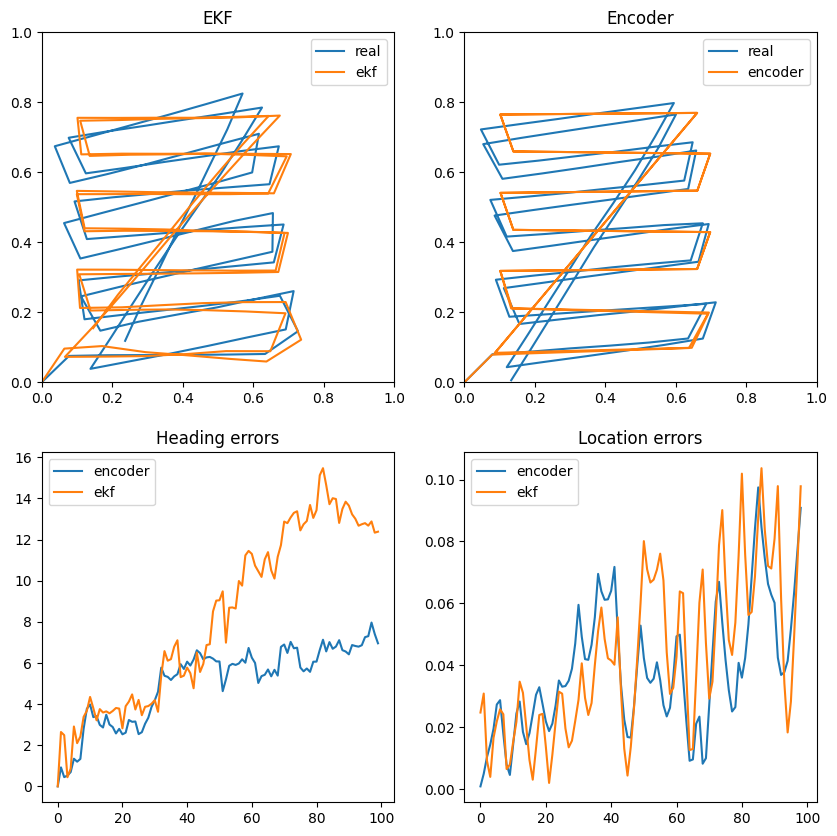

In [87]:
plot_run('encoder_lawn_run.csv', 100)

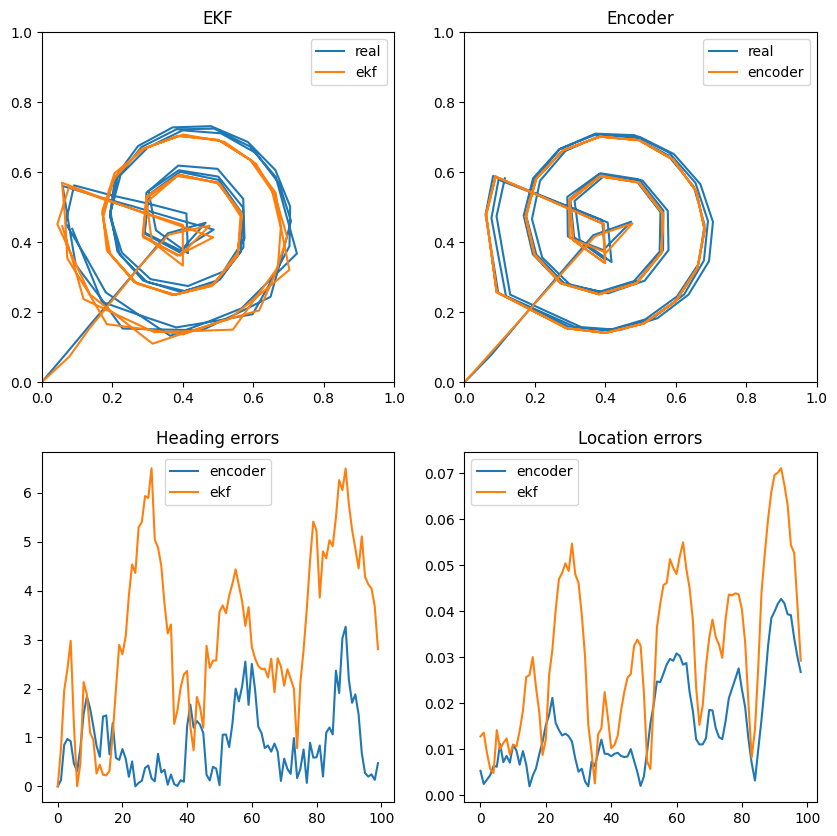

In [88]:
plot_run('ekf_cw_spiral_in_out_run.csv', 100)

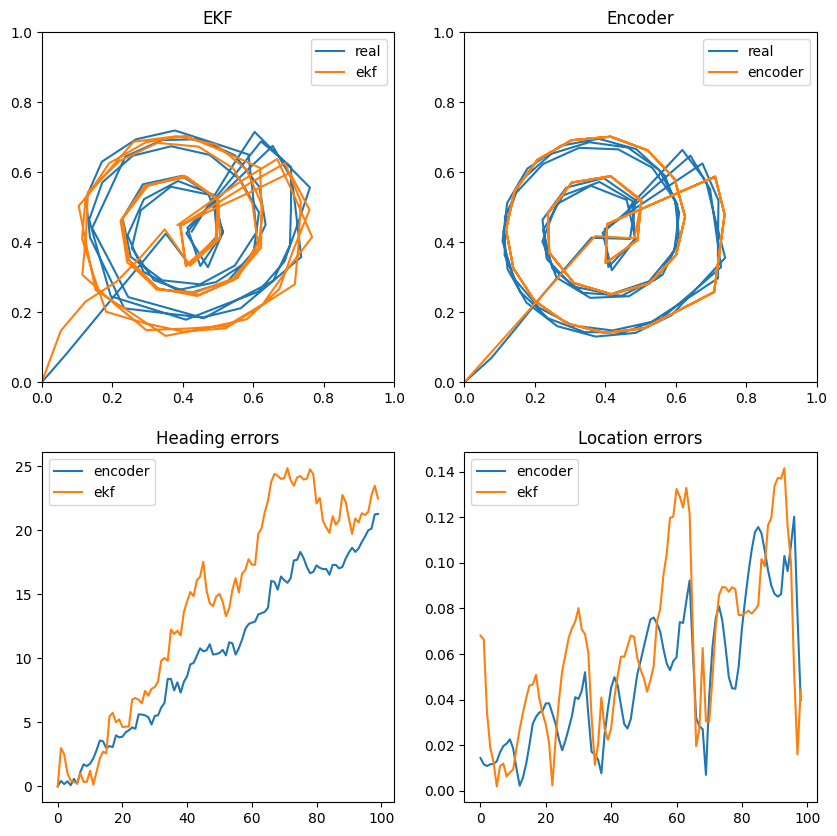

In [90]:
plot_run('ekf_ccw_spiral_in_out_run.csv', 100)